https://mp.weixin.qq.com/s/PYQfd9jBRSATZQTQQmy-Ew

# 缺失数据处理

In [61]:
import pandas as pd
from io import StringIO

In [62]:
csv_data = '''A,B,C,D
 41.0,2.0,3.0,4.0
 55.0,6.0,,8.0
 610.0,11.0,12.0,'''
df = pd.read_csv(StringIO(csv_data))

In [63]:
df

,A,B,C,D
0,41.0,2.0,3.0,4.0
1,55.0,6.0,NaN,8.0
2,610.0,11.0,12.0,NaN


In [64]:
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

## 删除有缺失的样本或特征

In [65]:
# 删除含有缺失值的样本（即行）
print (df.dropna())
print ('\n')

      A    B    C    D
0  41.0  2.0  3.0  4.0




In [66]:
# 删除含有缺失值的特征（即列）
df.dropna(axis=1)

,A,B
0,41.0,2.0
1,55.0,6.0
2,610.0,11.0


In [67]:
# 删除所有列都是缺失的样本
df.dropna(how='all')

,A,B,C,D
0,41.0,2.0,3.0,4.0
1,55.0,6.0,NaN,8.0
2,610.0,11.0,12.0,NaN


In [68]:
# 删除没有4个非空特征的样本
print (df.dropna(thresh=4))

      A    B    C    D
0  41.0  2.0  3.0  4.0


In [69]:
# 删除指定特征上有缺失的样本（这里‘c'为指定特征）
print (df.dropna(subset=['C']))

       A     B     C    D
0   41.0   2.0   3.0  4.0
2  610.0  11.0  12.0  NaN


## 填充缺失值
有些特征的缺失其实是可以通过填充的方式来弥补的，所以这里也介绍一下sklearn中的Imputer类方法。

参数axis：axis=0计算每个特征取值的平均值用来填充，若axis=1则计算样本所有取值的平均值用来填充；

参数strategy：包括mean、median和most_frequent（most_frequent对于处理分类数据类型的缺失值很有用）。

In [70]:
from sklearn.preprocessing import Imputer
# 这里使用均值填充
imr = Imputer(missing_values='NaN', strategy='mean', axis=0)
imr = imr.fit(df)
imputed_data = imr.transform(df.values)
imputed_data

array([[ 41. ,   2. ,   3. ,   4. ],
       [ 55. ,   6. ,   7.5,   8. ],
       [610. ,  11. ,  12. ,   6. ]])

In [71]:
imr = Imputer(missing_values='NaN', strategy='mean', axis=1)
imr = imr.fit(df)
imputed_data = imr.transform(df.values)
imputed_data

array([[ 41.,   2.,   3.,   4.],
       [ 55.,   6.,  23.,   8.],
       [610.,  11.,  12., 211.]])

In [72]:
df.values

array([[ 41.,   2.,   3.,   4.],
       [ 55.,   6.,  nan,   8.],
       [610.,  11.,  12.,  nan]])

In [73]:
df

,A,B,C,D
0,41.0,2.0,3.0,4.0
1,55.0,6.0,NaN,8.0
2,610.0,11.0,12.0,NaN


# 处理分类数据

In [87]:
import pandas as pd
df = pd.DataFrame([['green', 'M', 10.1, 'new balance'],
                   ['red', 'L', 13.5, 'Nike'],
                   ['blue', 'XL', 15.3, 'new balance']])
df.columns = ['颜色', '尺寸', '单价', '牌子']
df

,颜色,尺寸,单价,牌子
0,green,M,10.1,new balance
1,red,L,13.5,Nike
2,blue,XL,15.3,new balance


## 映射有序特性

In [88]:
size_mapping = {'XL': 3,
                'L': 2,
                'M': 1}
df['尺寸'] = df['尺寸'].map(size_mapping)
df

,颜色,尺寸,单价,牌子
0,green,1,10.1,new balance
1,red,2,13.5,Nike
2,blue,3,15.3,new balance


In [89]:
# 反映射字典 
inv_size_mapping = {v: k for k, v in size_mapping.items()}
df['尺寸'] = df['尺寸'].map(inv_size_mapping)
df

,颜色,尺寸,单价,牌子
0,green,M,10.1,new balance
1,red,L,13.5,Nike
2,blue,XL,15.3,new balance


## 对类别特征进行编码

上面是对一些无序分类特征进行了映射编码，那么对于我们的标签（也叫类别、目标）也是需要进行编码的，这样子算法才可以进行识别解释。一样的，标签也是无序的，我们可以从0开始编码。

In [90]:
import numpy as np
class_mapping = {label: idx for idx, label in enumerate(np.unique(df['牌子']))}
class_mapping

{'Nike': 0, 'new balance': 1}

In [91]:
df['牌子'] = df['牌子'].map(class_mapping)
df

,颜色,尺寸,单价,牌子
0,green,M,10.1,1
1,red,L,13.5,0
2,blue,XL,15.3,1


In [92]:
# 同样的，也可以转回去
inv_class_mapping = {v: k for k, v in class_mapping.items()}
df['牌子'] = df['牌子'].map(inv_class_mapping)
df

,颜色,尺寸,单价,牌子
0,green,M,10.1,new balance
1,red,L,13.5,Nike
2,blue,XL,15.3,new balance


上面是我们自己手动创建的映射字典，sklearn中提供了LabelEncoder类来实现类似的类别转换工作。

In [93]:
# 使用自带的LabelEncoder类来实现类别的转换
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df['牌子'].values)
df['牌子'] = y
df

,颜色,尺寸,单价,牌子
0,green,M,10.1,1
1,red,L,13.5,0
2,blue,XL,15.3,1


In [94]:
# 同样的，也可以转回去
y_inv = class_le.inverse_transform(y)
df['牌子'] = y_inv
df

D:\anaconda3-5.1.0\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


,颜色,尺寸,单价,牌子
0,green,M,10.1,new balance
1,red,L,13.5,Nike
2,blue,XL,15.3,new balance


## 对无序特征进行“独热编码”
https://www.cnblogs.com/zhoukui/p/9159909.html scikit-learn 中 OneHotEncoder 解析

上面讲了有序分类变量和类别的编码操作，但是对无序分类变量是否也可以类似地操作呢？答案是不行的。就上面的栗子，其中颜色就是无序分类变量，如果按照上面的编码方式，green、red和blue将会被编码为1、2、3，而这样子算法就会误认为green<red<blue，然而，他们之间是没有这样子的顺序的。

所以，我们不能采取上面的操作，这里介绍一个“独热编码”。下面我们使用LabelEncoder来进行转换：

In [95]:
df['尺寸'] = df['尺寸'].map(size_mapping)
X = df[['颜色', '尺寸', '单价']].values
X

array([['green', 1, 10.1],
       ['red', 2, 13.5],
       ['blue', 3, 15.3]], dtype=object)

In [98]:
color_le = LabelEncoder()
X[:, 0] = color_le.fit_transform(X[:, 0])
X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

In [101]:
X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

In [102]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categorical_features=[0])#categorical_features这个参数指定了对哪些特征进行编码
ohe.fit_transform(X).toarray()

array([[ 0. ,  1. ,  0. ,  1. , 10.1],
       [ 0. ,  0. ,  1. ,  2. , 13.5],
       [ 1. ,  0. ,  0. ,  3. , 15.3]])

In [103]:
pd.get_dummies(df[['单价', '颜色', '尺寸']])#pandas提供对one-hot编码的函数是：pd.get_dummies()

,单价,尺寸,颜色_blue,颜色_green,颜色_red
0,10.1,1,0,1,0
1,13.5,2,0,0,1
2,15.3,3,1,0,0


In [47]:
categorical_features=[0]

# 学习划分训练及验证集

In [30]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/'
                      'ml/machine-learning-databases/wine/wine.data',
                      header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']
print('Class labels', np.unique(df_wine['Class label']))
df_wine.head()

Class labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


其中，酒的种类有3种，分别是class label 1、2、3，我们调用下面的代码划分训练和验证集，

test_size=0.3，使得训练集占Wine样本数的70%，测试集占30%。

在分割数据集时，我们一般选择60:40, 70:30或者80:20。对于大数据集，90:10甚至 99:1也是比较常见的。

In [31]:
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, random_state=0)

# 统一特征取值范围
## 归一化与标准化演示
面对这些情况，还是有方法可以解决的，使得不同的特征有相同的取值范围，分别是：

> 归一化(normalization)：归一化指的是将特征范围缩放到[0,1]，是最小-最大缩放(min-max scaling)的特例。

> 标准化(standardization)：将特征值缩放到以0为中心，标准差为1，换句话说，标准化后的特征形式服从正态分布，这样学习权重参数更容易。

In [32]:
ex = pd.DataFrame([0, 1, 2, 3, 4, 5])
# 标准化
ex[1] = (ex[0] - ex[0].mean()) / ex[0].std(ddof=0)
# 归一化
ex[2] = (ex[0] - ex[0].min()) / (ex[0].max() - ex[0].min())
ex.columns = ['input', 'standardized', 'normalized']
ex

,input,standardized,normalized
0,0,-1.46385,0.0
1,1,-0.87831,0.2
2,2,-0.29277,0.4
3,3,0.29277,0.6
4,4,0.87831,0.8
5,5,1.46385,1.0


## 归一化实现代码

In [33]:

from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

##  标准化实现代码

In [34]:

from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

# 选择有意义（有效）的特征
模型过拟合的一个原因是对于给定的训练集数据，模型过于复杂，常用的减小泛化误差的做法包括：

收集更多的训练集数据

正则化，即引入模型复杂度的惩罚项

选择一个简单点的模型，参数少一点的

降低数据的维度

下面，我们重点学习正则化和特征选择的方法来降低过拟合。

## L1正则化

In [35]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1', C=0.1)
lr.fit(X_train_std, y_train)
print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))

Training accuracy: 0.9838709677419355
Test accuracy: 0.9814814814814815


我们可以看看，在不同正则下的特征数量变化情况：我们可以发现，如果C<0.1,正则项威力很大时，所有特征权重都为0：


 <font color='blue' >需要研究</font>

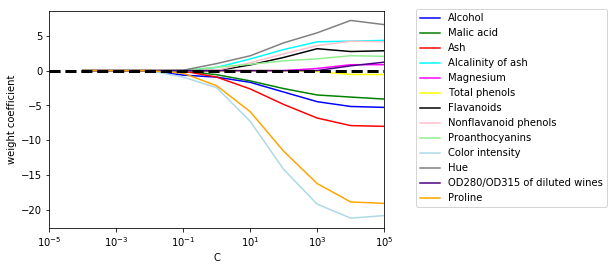

In [36]:
 import matplotlib.pyplot as plt
 fig = plt.figure()
 ax = plt.subplot(111)
 colors = ['blue', 'green', 'red', 'cyan', 
           'magenta', 'yellow', 'black', 
           'pink', 'lightgreen', 'lightblue', 
           'gray', 'indigo', 'orange']
 weights, params = [], []
 for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty='l1', C=10.**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)
weights = np.array(weights)
for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=df_wine.columns[column + 1],
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', 
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
plt.show()

## 序列特征选择算法

另一种减小模型复杂度和避免过拟合的方法是通过特征选择进行维度降低(dimensionality reduction)，这个方法尤其对非正则模型有用。维度降低有两种做法：特征选择(feature selection)和特征抽取(feature extraction)。

特征选择会从原始特征集中选择一个子集合。特征抽取是从原始特征空间抽取信息，从而构建一个新的特征子空间，我们主要学习这种特征选择算法。
特征选择算法的原理是自动选择一个特征子集，子集中的特征都是和问题最相关的特征，这样能够提高计算效率并且由于溢出了不相干特征和噪音也降低了模型的泛化误差。

一个经典的序列特征选择算法是序列后向选择(sequential backward selection, SBS)，它能够降低原始特征维度提高计算效率，在某些情况下，如果模型过拟合，使用SBS后甚至能提高模型的预测能力。


 <font color='red' >SBS算法</font>

In [37]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state
    def fit(self, X, y):
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
                             random_state=self.random_state)
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]
        while dim > self.k_features:
            scores = []
            subsets = []
            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train, 
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)
            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1
            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]
        return self
    def transform(self, X):
        return X[:, self.indices_]
    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

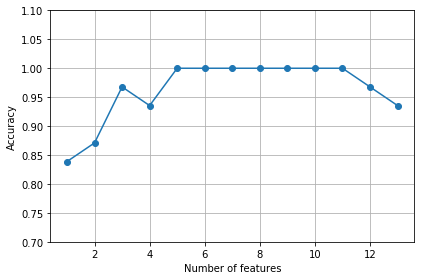

In [38]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
# selecting features
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)
# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.1])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()

In [39]:
# 打印出最优的5个特征
k5 = list(sbs.subsets_[8])
print(df_wine.columns[1:][k5])

Index(['Alcohol', 'Malic acid', 'Alcalinity of ash', 'Hue', 'Proline'], dtype='object')


In [40]:
# 原模型的预测效果（即全变量）
knn.fit(X_train_std, y_train)
print('Training accuracy:', knn.score(X_train_std, y_train))
print('Test accuracy:', knn.score(X_test_std, y_test))

Training accuracy: 0.9838709677419355
Test accuracy: 0.9444444444444444


In [41]:
# 特征选择后的新模型预测效果
knn.fit(X_train_std[:, k5], y_train)
print('Training accuracy:', knn.score(X_train_std[:, k5], y_train))
print('Test accuracy:', knn.score(X_test_std[:, k5], y_test))

Training accuracy: 0.9596774193548387
Test accuracy: 0.9629629629629629


#  使用随机森林评估特征重要性
随机森林能够度量每个特征的重要性，我们可以依据这个重要性指标进而选择最重要的特征。sklearn中已经实现了用随机森林评估特征重要性，在训练好随机森林模型后，直接调用feature_importances属性就能得到每个特征的重要性。

下面用Wine数据集为例，我们训练一个包含10000棵决策树的随机森林来评估13个维度特征的重要性(第三章我们就说过，对于基于树的模型，不必对特征进行标准化或归一化)：

 1) Color intensity                0.182483
 2) Proline                        0.158610
 3) Flavanoids                     0.150948
 4) OD280/OD315 of diluted wines   0.131987
 5) Alcohol                        0.106589
 6) Hue                            0.078243
 7) Total phenols                  0.060718
 8) Alcalinity of ash              0.032033
 9) Malic acid                     0.025400
10) Proanthocyanins                0.022351
11) Magnesium                      0.022078
12) Nonflavanoid phenols           0.014645
13) Ash                            0.013916


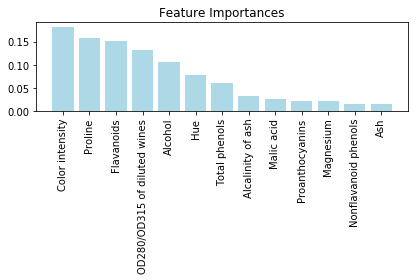

In [44]:
from sklearn.ensemble import RandomForestClassifier
feat_labels = df_wine.columns[1:]
forest = RandomForestClassifier(n_estimators=10000,
                                random_state=0,
                                n_jobs=-1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        color='lightblue', 
        align='center')
plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

我们可以得出结论：‘Alcohol’是最能区分类别的特征。有趣地是，重要性排名前三的特征也在SBS的最优5特征子集中。

sklearn的随机森林实现，包括一个transform方法能够基于用户给定的阈值进行特征选择，所以如果你要用RandomFroestClassifier作为特征选择器，可以设置阈值为0.15，会选择出三个维度特征，Alcohol、Malic acid和Ash。

In [45]:
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(forest, threshold=0.15, prefit=True)
X_selected = sfm.transform(X_train)
X_selected.shape

(124, 3)